In [42]:
import _pickle as cPickle
import numpy as np
import matplotlib.pyplot as plt
import lsh
import pylab

In [47]:
def boxplots(fileName,cdist,h):

    data =  dict()

    for i in range(len(h)):
        for j in range(i,len(h)):
            val = int(cdist[i][j])
            if val in data:
                data[val].append(h[i][j])
            else: 
                data[val] = [h[i][j]]
                
    fpickle = fileName.split('/')
    writePickle("trajectories/pickle/" + fpickle[1] + "boxplotdata", data)

def boxplotsfromFile(fileName,ylabel,name):

    f =  open(fileName, 'rb')
    data = cPickle.load(f)
    f.close()
    fpickle = fileName.split('/')

    ys = [np.median(a) for a in data.values()]
    errors1 = [np.percentile(a,95) for a in data.values()]
    errors2 = [np.percentile(a,5) for a in data.values()]
    errors = [np.std(a) for a in data.values()]
    xs = range(1,len(data.values())+1)
    ys1 = [ys[i]-errors[i] for i in range(len(ys))]
    ys2 = [ys[i]+errors[i] for i in range(len(ys))]
    #plt.plot(xs, ys, '-')
    plt.plot(xs, ys, 'ro-')
    pylab.fill_between(xs, errors2, errors1, alpha = 0.5)
    ax = plt.axes()
    plt.xticks(np.arange(min(data.keys()), max(data.keys())+10, 10))
    plt.yticks(np.arange(0, max(ys)+1000, 1000))

    if fileName!="":
        plt.xlabel('Disc Intersection Distance')
        plt.ylabel(ylabel)
        #savefig(fpickle[0]+ "/" +fpickle[1]+"/boxplots/" + name, bbox_inches='tight')
        plt.show()
        #plt.close()

def writePickle(where, what):

    newf = open(where, 'wb')
    cPickle.dump(what,newf)
    newf.close()

In [49]:
a = open("trajectories/pkdd100-utm-box",'rb')
h = cPickle.load(open( "haus100-utm-box","rb"))
f = cPickle.load(open( "frechet100-utm-box","rb"))
trajectories = cPickle.load(a)
a.close()

In [53]:
n = 40
Rs = np.repeat(3000,n)
circles = lsh.findCircles(trajectories, n)
binary_vectors = lsh.binaryVectors(trajectories, circles, Rs)
cdist = lsh.makeCdist(trajectories,circles,binary_vectors)

In [58]:
boxplots("trajectories/pkdd100-utm-box",cdist,h)

/afs/inf.ed.ac.uk/user/s10/s1043682/.local/lib/python3.4/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


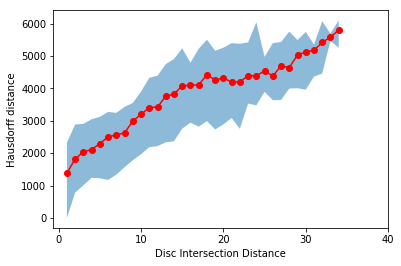

In [59]:
boxplotsfromFile("trajectories/pickle/pkdd100-utm-boxboxplotdata","Hausdorff distance","")